In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import os

In [2]:
PATH = "./"

In [3]:
data={}

for file_name in os.listdir(PATH):
    if file_name.endswith("pkl"):
        file_path = os.path.join(PATH, file_name)
        with open(file_path, 'rb') as file:
            data[file_name] = pickle.load(file)

In [4]:
data.keys()

dict_keys(['LogitLossData.pkl', 'MultiLossData.pkl', 'TrainedLossData.pkl'])

### 1. Loss Components on Training Dataset Batches

70


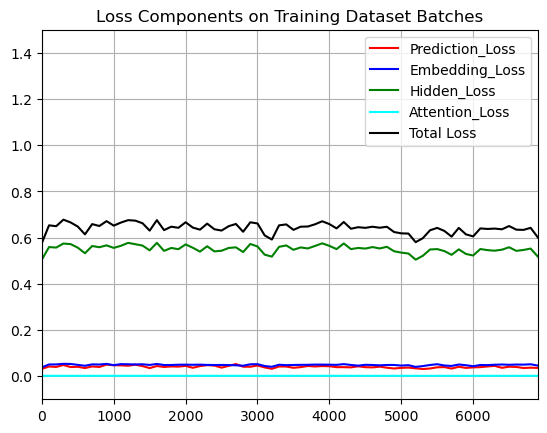

In [5]:
m=100
size=data['MultiLossData.pkl']["losses_eval"]['pred_loss'].__len__() // m
print(size)
x = np.arange(size)*m

pred_loss = np.array(data['MultiLossData.pkl']["losses_eval"]['pred_loss'])[:size*m].reshape(-1, m).mean(axis=1)
embd_loss = np.array(data['MultiLossData.pkl']["losses_eval"]['embd_loss'])[:size*m].reshape(-1, m).mean(axis=1)
hidden_loss = np.array(data['MultiLossData.pkl']["losses_eval"]['hidden_loss'])[:size*m].reshape(-1, m).mean(axis=1)
attention_loss = np.array(data['MultiLossData.pkl']["losses_eval"]['attention_loss'])[:size*m].reshape(-1, m).mean(axis=1)

plt.plot(x, pred_loss, color="red", label="Prediction_Loss")
plt.plot(x, embd_loss, color="blue", label="Embedding_Loss")
plt.plot(x, hidden_loss, color="green", label="Hidden_Loss")
plt.plot(x, attention_loss, color="cyan", label="Attention_Loss")
plt.plot(x, pred_loss + embd_loss + hidden_loss + attention_loss, color="black", label="Total Loss")

plt.title("Loss Components on Training Dataset Batches")
plt.xlim(0, x[-1])
plt.ylim(-0.1, 1.5)
plt.legend()
plt.grid()
plt.savefig("./different_losses.jpg")
plt.show()

### 2. Performance of the Models on Training Dataset Batches

70


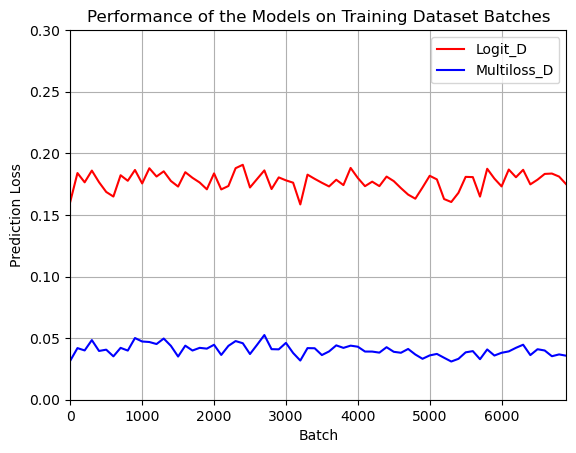

In [6]:
m=100
size=data['LogitLossData.pkl']["losses_eval"]['pred_loss'].__len__() // m
print(size)
x = np.arange(size)*m

logit_loss = np.array(data['LogitLossData.pkl']["losses_eval"]['pred_loss'])[:size*m].reshape(-1, m).mean(axis=1)
multi_loss = np.array(data['MultiLossData.pkl']["losses_eval"]['pred_loss'])[:size*m].reshape(-1, m).mean(axis=1)
trained_loss = np.array(data['TrainedLossData.pkl']["losses_eval"]['pred_loss'])[:size*m].reshape(-1, m).mean(axis=1)

plt.plot(x, logit_loss, color="red", label="Logit_D")
plt.plot(x, multi_loss, color="blue", label="Multiloss_D")
#plt.plot(x, trained_loss, color="green", label="Fully_trained")
plt.title("Performance of the Models on Training Dataset Batches")
plt.xlim(0, x[-1])
plt.xlabel("Batch")
plt.ylim(0, 0.3)
plt.ylabel("Prediction Loss")
plt.legend()
plt.grid()
plt.savefig("./taining_inference_loss.jpg")
plt.show()

### 3. Performance of the Models on Testing Dataset Batches

34


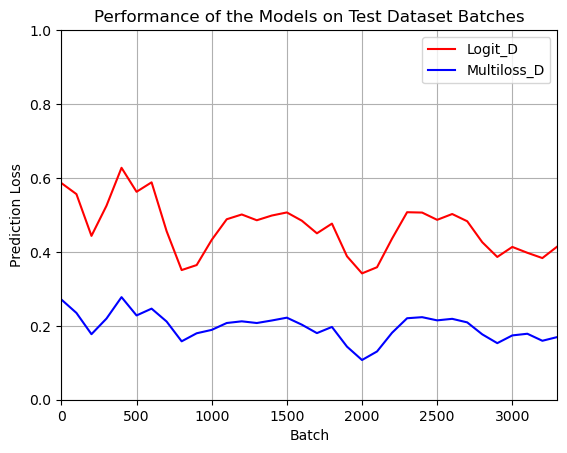

In [7]:
m=100
size=data['LogitLossData.pkl']["losses_test"]['pred_loss'].__len__() // m
print(size)
x = np.arange(size)*m

logit_loss = np.array(data['LogitLossData.pkl']["losses_test"]['pred_loss'])[:size*m].reshape(-1, m).mean(axis=1)
multi_loss = np.array(data['MultiLossData.pkl']["losses_test"]['pred_loss'])[:size*m].reshape(-1, m).mean(axis=1)
trained_loss = np.array(data['TrainedLossData.pkl']["losses_test"]['pred_loss'])[:size*m].reshape(-1, m).mean(axis=1)

plt.plot(x, logit_loss, color="red", label="Logit_D")
plt.plot(x, multi_loss, color="blue", label="Multiloss_D")
#plt.plot(x, trained_loss, color="green", label="Fully_trained")
plt.title("Performance of the Models on Test Dataset Batches")
plt.xlim(0, x[-1])
plt.xlabel("Batch")
plt.ylim(0, 1)
plt.ylabel("Prediction Loss")
plt.legend()
plt.grid()
plt.savefig("./testing_inference_loss.jpg")
plt.show()

70


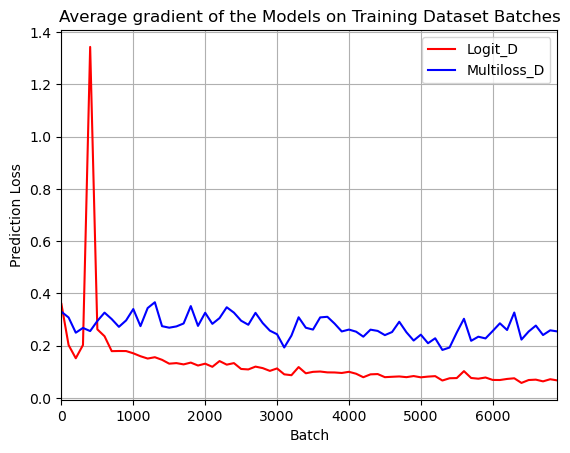

In [8]:
m=100
size=data['LogitLossData.pkl']["losses_eval"]['pred_loss'].__len__() // m
print(size)
x = np.arange(size)*m

logit_loss = np.array(data['LogitLossData.pkl']["norms_train"])[:size*m].reshape(-1, m).mean(axis=1)
multi_loss = np.array(data['MultiLossData.pkl']["norms_train"])[:size*m].reshape(-1, m).mean(axis=1)
#trained_loss = np.array(data['TrainedLossData.pkl']["norms_train"]['pred_loss'])[:size*m].reshape(-1, m).mean(axis=1)

plt.plot(x, logit_loss, color="red", label="Logit_D")
plt.plot(x, multi_loss, color="blue", label="Multiloss_D")
#plt.plot(x, trained_loss, color="green", label="Fully_trained")
plt.title("Average gradient of the Models on Training Dataset Batches")
plt.xlim(0, x[-1])
plt.xlabel("Batch")
plt.grid()
#plt.ylim(-1, 5)
plt.ylabel("Prediction Loss")
plt.legend()
plt.savefig("./grad_norms.jpg")
plt.show()